# Question 1 

In [3]:
import pandas as pd
dataset_url = "https://github.com/justmarkham/DAT8/raw/master/data/u.user"
users = pd.read_csv(dataset_url, sep='|', index_col='user_id', on_bad_lines='skip')



In [5]:
mean_age_by_occupation = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:")
print(mean_age_by_occupation)

Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [6]:
male_ratio_by_occupation = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').sum() / x.count()).sort_values(ascending=False)
print("\nMale ratio per occupation (sorted):")
print(male_ratio_by_occupation)


Male ratio per occupation (sorted):
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [7]:
min_max_age_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMinimum and Maximum ages per occupation:")
print(min_max_age_by_occupation)


Minimum and Maximum ages per occupation:
               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [8]:
mean_age_by_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean age per occupation and sex:")
print(mean_age_by_occupation_sex)


Mean age per occupation and sex:
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986

In [10]:
# gender_percentage_by_occupation = users.groupby(['occupation', 'gender']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
print("\nPercentage of women and men per occupation:")
print(gender_percentage_by_occupation)


Percentage of women and men per occupation:
gender                F         M
occupation                       
administrator  0.455696  0.544304
artist         0.464286  0.535714
doctor              NaN  1.000000
educator       0.273684  0.726316
engineer       0.029851  0.970149
entertainment  0.111111  0.888889
executive      0.093750  0.906250
healthcare     0.687500  0.312500
homemaker      0.857143  0.142857
lawyer         0.166667  0.833333
librarian      0.568627  0.431373
marketing      0.384615  0.615385
none           0.444444  0.555556
other          0.342857  0.657143
programmer     0.090909  0.909091
retired        0.071429  0.928571
salesman       0.250000  0.750000
scientist      0.096774  0.903226
student        0.306122  0.693878
technician     0.037037  0.962963
writer         0.422222  0.577778


# Question 2

In [11]:
import pandas as pd
dataset_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(dataset_url)



In [12]:
goals = euro12['Goals']

In [13]:
num_teams = euro12['Team'].nunique()
print("Number of teams participated in Euro2012:", num_teams)

Number of teams participated in Euro2012: 16


In [14]:
num_columns = len(euro12.columns)
print("Number of columns in the dataset:", num_columns)

Number of columns in the dataset: 35


In [15]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline dataframe:")


Discipline dataframe:


In [16]:
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print(discipline_sorted)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [17]:
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("\nMean Yellow Cards given per Team:", mean_yellow_cards)


Mean Yellow Cards given per Team: 7.4375


In [18]:
teams_more_than_six_goals = euro12[euro12['Goals'] > 6]
print("\nTeams that scored more than 6 goals:")
print(teams_more_than_six_goals)


Teams that scored more than 6 goals:
       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             1

In [19]:
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print("\nTeams starting with G:")
print(teams_starting_with_G)


Teams starting with G:
      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 ro

In [20]:
first_seven_columns = euro12.iloc[:, :7]
print("\nFirst 7 columns:")
print(first_seven_columns)


First 7 columns:
                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13              

In [21]:
all_columns_except_last_three = euro12.iloc[:, :-3]
print("\nAll columns except the last 3:")
print(all_columns_except_last_three)


All columns except the last 3:
                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13

In [22]:
selected_teams = ['England', 'Italy', 'Russia']
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(selected_teams)][['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy for England, Italy, and Russia:")
print(shooting_accuracy_selected_teams)


Shooting Accuracy for England, Italy, and Russia:
       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# Question 3

In [24]:
import pandas as pd
import numpy as np

In [25]:
np.random.seed(42)  # Setting seed for reproducibility
series1 = pd.Series(np.random.randint(1, 5, size=100), name='bedrs')
series2 = pd.Series(np.random.randint(1, 4, size=100), name='bathrs')
series3 = pd.Series(np.random.randint(10000, 30001, size=100), name='price_sqr_meter')

In [26]:

housing_df = pd.concat([series1, series2, series3], axis=1)

In [27]:

housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

In [28]:

bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)

In [29]:
# Step 6: Check if it goes only until index 99
print("Is it true that it goes only until index 99?", bigcolumn.index.max() == 99)


Is it true that it goes only until index 99? False


In [30]:
# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)

In [31]:
# Display the results
print("\nHousing DataFrame:")
print(housing_df.head())
print("\nBigcolumn DataFrame:")
print(bigcolumn.head())


Housing DataFrame:
   bedrs  bathrs  price_sqr_meter
0      3       3            23931
1      4       2            13627
2      1       2            26157
3      3       2            20173
4      3       2            28047

Bigcolumn DataFrame:
0    3
1    4
2    1
3    3
4    3
dtype: int32


# Question 4 

In [33]:
# Step 1: Import necessary libraries
import pandas as pd


In [34]:
# Step 2: Import the dataset from the attached file wind.txt
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
data = pd.read_table(url, sep='\s+', parse_dates=[[0, 1, 2]])

In [35]:
# Step 3: Replace the first 3 columns by a proper datetime index
data.columns = ['date', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']
data.set_index('date', inplace=True)

In [36]:

# Step 4: Fix the year 2061 and apply the function
def fix_year(year):
    if year > 2000:
        year -= 100
    return year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))


In [37]:
# Step 5: Set the right dates as the index with datetime
data.index = pd.to_datetime(data.index)

In [38]:
# Step 6: Compute how many values are missing for each location over the entire record
missing_values = data.isnull().sum()
print("Missing values for each location over the entire record:")
print(missing_values)

Missing values for each location over the entire record:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [39]:
# Step 7: Compute how many non-missing values there are in total
total_non_missing_values = data.notnull().sum().sum()
print("\nTotal non-missing values:", total_non_missing_values)


Total non-missing values: 78857


In [40]:
# Step 8: Calculate the mean windspeeds over all locations and times
mean_windspeed = data.mean().mean()
print("\nMean windspeed over all locations and times:", mean_windspeed)


Mean windspeed over all locations and times: 10.227982360836938


In [41]:
# Step 9: Create loc_stats DataFrame and calculate min, max, mean, and std for each location
loc_stats = data.agg(['min', 'max', 'mean', 'std'])
print("\nloc_stats DataFrame:")
print(loc_stats)


loc_stats DataFrame:
            RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  


In [42]:
# Step 10: Create day_stats DataFrame and calculate min, max, mean, and std for each day
day_stats = data.resample('D').agg(['min', 'max', 'mean', 'std'])
print("\nday_stats DataFrame:")
print(day_stats)


day_stats DataFrame:
              RPT                      VAL                      ROS         \
              min    max   mean std    min    max   mean std    min    max   
date                                                                         
1961-01-01  15.04  15.04  15.04 NaN  14.96  14.96  14.96 NaN  13.17  13.17   
1961-01-02  14.71  14.71  14.71 NaN    NaN    NaN    NaN NaN  10.83  10.83   
1961-01-03  18.50  18.50  18.50 NaN  16.88  16.88  16.88 NaN  12.33  12.33   
1961-01-04  10.58  10.58  10.58 NaN   6.63   6.63   6.63 NaN  11.75  11.75   
1961-01-05  13.33  13.33  13.33 NaN  13.25  13.25  13.25 NaN  11.42  11.42   
...           ...    ...    ...  ..    ...    ...    ...  ..    ...    ...   
1978-12-27  17.58  17.58  17.58 NaN  16.96  16.96  16.96 NaN  17.62  17.62   
1978-12-28  13.21  13.21  13.21 NaN   5.46   5.46   5.46 NaN  13.46  13.46   
1978-12-29  14.00  14.00  14.00 NaN  10.29  10.29  10.29 NaN  14.42  14.42   
1978-12-30  18.50  18.50  18.50 NaN  14.04

In [44]:
# Step 11: Find the average windspeed in January for each location
january_avg_windspeed = data[data.index.month == 1].groupby(data[data.index.month == 1].index.year).mean()
print("\nAverage windspeed in January for each location:")
print(january_avg_windspeed)



Average windspeed in January for each location:
            RPT        VAL        ROS        KIL        SHA        BIR  \
date                                                                     
1961  14.841333  11.988333  13.431613   7.736774  11.072759   8.588065   
1962  14.783871  13.160323  12.591935   7.538065  11.779677   8.720000   
1963  14.868387  11.112903  15.121613   6.635806  11.080645   7.835484   
1964  12.661290  11.818387  11.741290   6.953548  11.400645   6.865806   
1965  15.741613  15.546774  15.274194   8.258387  13.588065   9.251290   
1966  15.834839  13.283226  15.136452   8.659355  12.968065   9.163548   
1967  13.736129  11.470968  11.537419   6.928065  10.833548   6.730323   
1968  14.733226  12.829032  12.294194   7.849032  12.262581   7.133226   
1969  12.824839  12.113871  11.403871   6.708710  10.557097   5.926452   
1970  13.152581  11.731935  13.083871   5.810968   9.507742   8.040323   
1971  15.098065  13.398387  13.080000   6.364194  11.342258   7

In [45]:
# Step 12: Downsample to a yearly frequency for each location
yearly_data = data.resample('Y').mean()
print("\nYearly downsampled data:")
print(yearly_data)



Yearly downsampled data:
                  RPT        VAL        ROS       KIL        SHA       BIR  \
date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.0

In [46]:

# Step 13: Downsample to a monthly frequency for each location
monthly_data = data.resample('M').mean()
print("\nMonthly downsampled data:")
print(monthly_data)


Monthly downsampled data:
                  RPT        VAL        ROS       KIL        SHA        BIR  \
date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13

In [47]:
# Step 14: Downsample to a weekly frequency for each location
weekly_data = data.resample('W').mean()
print("\nWeekly downsampled data:")
print(weekly_data)


Weekly downsampled data:
                  RPT        VAL        ROS        KIL        SHA        BIR  \
date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14

In [48]:
# Step 15: Calculate min, max, mean, and std for each week for the first 52 weeks
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
print("\nWeekly statistics for the first 52 weeks:")
print(weekly_stats)


Weekly statistics for the first 52 weeks:
              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.95142

# Question 5 

In [49]:
import pandas as pd
# Step 2: Import the dataset from the given address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

In [50]:
# Step 4: See the first 10 entries
print("First 10 entries:")
print(chipo.head(10))

First 10 entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3            

In [51]:
# Step 5: Number of observations in the dataset
num_observations = len(chipo)
print("\nNumber of observations in the dataset:", num_observations)


Number of observations in the dataset: 4622


In [52]:
# Step 6: Number of columns in the dataset
num_columns = chipo.shape[1]
print("Number of columns in the dataset:", num_columns)

Number of columns in the dataset: 5


In [53]:
# Step 7: Print the name of all the columns
print("\nColumns in the dataset:")
print(chipo.columns)


Columns in the dataset:
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [54]:
# Step 8: How is the dataset indexed?
print("\nIndex of the dataset:")
print(chipo.index)


Index of the dataset:
RangeIndex(start=0, stop=4622, step=1)


In [55]:
# Step 9: Most-ordered item
most_ordered_item = chipo['item_name'].mode().values[0]
print("Most-ordered item:", most_ordered_item)

Most-ordered item: Chicken Bowl


In [56]:
# Step 10: Number of items ordered for the most-ordered item
num_items_ordered_most_ordered_item = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Number of items ordered for the most-ordered item:", num_items_ordered_most_ordered_item)

Number of items ordered for the most-ordered item: 761


In [57]:
# Step 11: Most ordered item in the choice_description column
most_ordered_item_choice_description = chipo['choice_description'].mode().values[0]
print("Most ordered item in the choice_description column:", most_ordered_item_choice_description)

Most ordered item in the choice_description column: [Diet Coke]


In [58]:
# Step 12: Total number of items ordered
total_items_ordered = chipo['quantity'].sum()
print("Total number of items ordered:", total_items_ordered)

Total number of items ordered: 4972


In [59]:

# Step 13: Turn the item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))


In [60]:
# Check the item price type
print("\nType of item price after conversion:")
print(chipo['item_price'].dtype)



Type of item price after conversion:
float64


In [61]:
# Step 14: Revenue for the period in the dataset
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Revenue for the period in the dataset:", revenue)

Revenue for the period in the dataset: 39237.02


In [62]:
# Step 15: Number of orders made in the period
num_orders = chipo['order_id'].nunique()
print("Number of orders made in the period:", num_orders)

Number of orders made in the period: 1834


In [64]:
# Step 16: Average revenue amount per order
average_revenue_per_order = revenue / num_orders
print("Average revenue amount per order:", average_revenue_per_order)




Average revenue amount per order: 21.39423118865867


In [65]:
# Step 17: Number of different items sold
num_different_items_sold = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items_sold)


Number of different items sold: 50


# Question 6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CSV file
file_path = r'C:\Users\rokad\Desktop\us-marriages-divorces-1867-2014.csv'

In [2]:
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

In [3]:
# Calculate marriages and divorces per capita
data['Marriages_per_capita'] = data['Marriages'] / data['Population']
data['Divorces_per_capita'] = data['Divorces'] / data['Population']


In [4]:
# Create a line plot
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

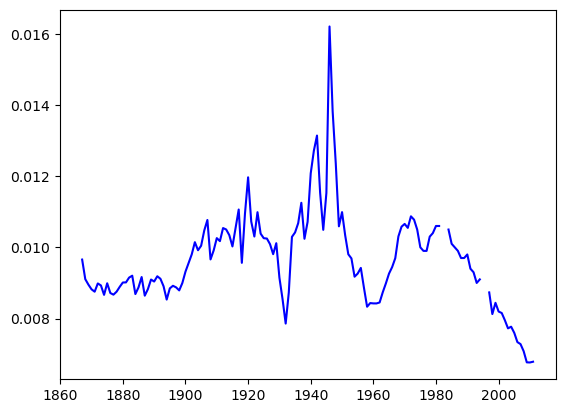

In [5]:
# Plotting marriages per capita
plt.plot(data['Year'], data['Marriages_per_capita'], label='Marriages per Capita', color='blue')

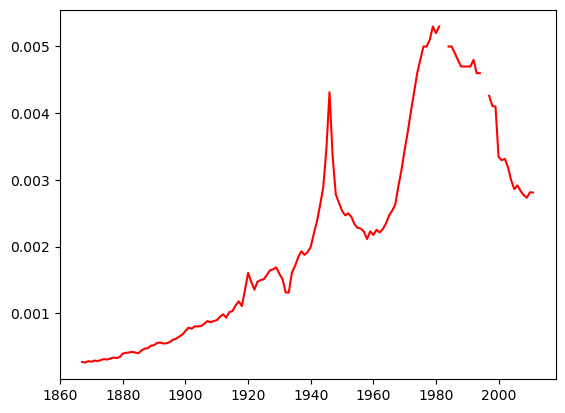

In [6]:
# Plotting divorces per capita
plt.plot(data['Year'], data['Divorces_per_capita'], label='Divorces per Capita', color='red')


Text(0.5, 1.0, 'Marriages and Divorces Per Capita in the U.S. (1867-2014)')

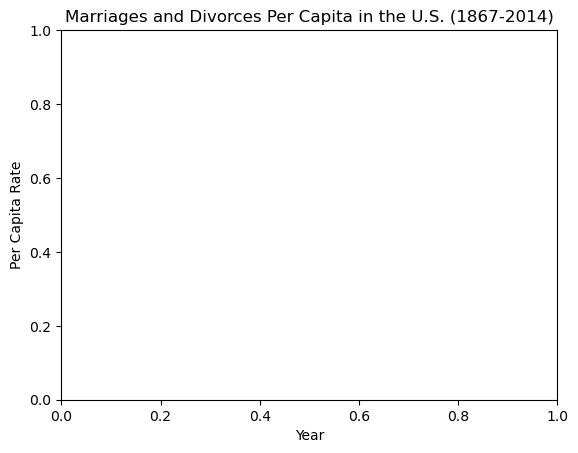

In [7]:
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Marriages and Divorces Per Capita in the U.S. (1867-2014)')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


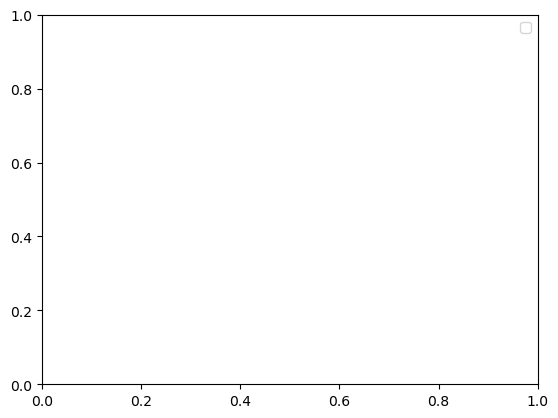

In [8]:
# Adding legend
plt.legend()

In [9]:
# Display the plot
plt.show()

# Question 7


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CSV file
file_path = r'C:\Users\rokad\Desktop\us-marriages-divorces-1867-2014.csv'


In [11]:
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

In [14]:
# Filter data for the years 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
selected_data = data[data['Year'].isin(selected_years)].copy()  # Make a copy to avoid SettingWithCopyWarning

In [15]:
# Calculate marriages and divorces per capita for the selected years using .loc
selected_data.loc[:, 'Marriages_per_capita'] = selected_data['Marriages'] / selected_data['Population']
selected_data.loc[:, 'Divorces_per_capita'] = selected_data['Divorces'] / selected_data['Population']

In [16]:
# Create a vertical bar chart
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 3 artists>

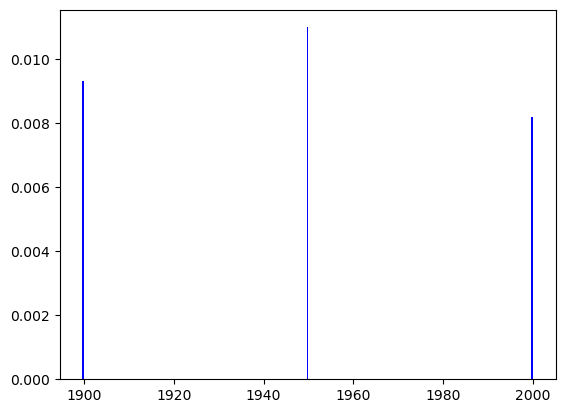

In [17]:
# Plotting marriages per capita
plt.bar(selected_data['Year'] - 0.2, selected_data['Marriages_per_capita'], width=0.4, label='Marriages per Capita', color='blue')

<BarContainer object of 3 artists>

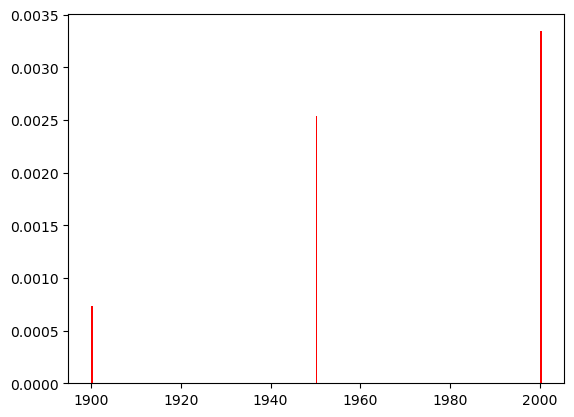

In [18]:
# Plotting divorces per capita
plt.bar(selected_data['Year'] + 0.2, selected_data['Divorces_per_capita'], width=0.4, label='Divorces per Capita', color='red')

Text(0.5, 1.0, 'Marriages and Divorces Per Capita in the U.S. (1900, 1950, 2000)')

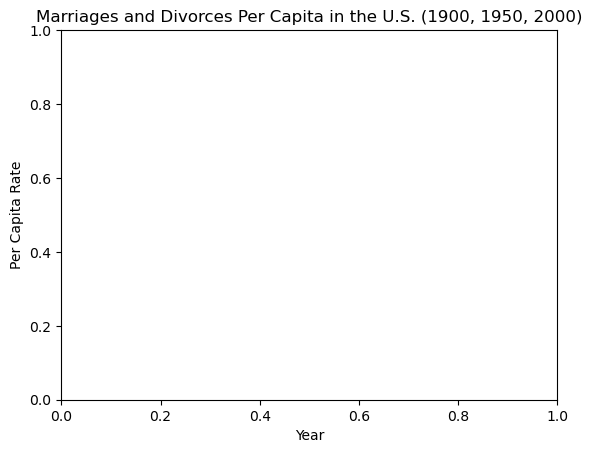

In [19]:

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Marriages and Divorces Per Capita in the U.S. (1900, 1950, 2000)')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


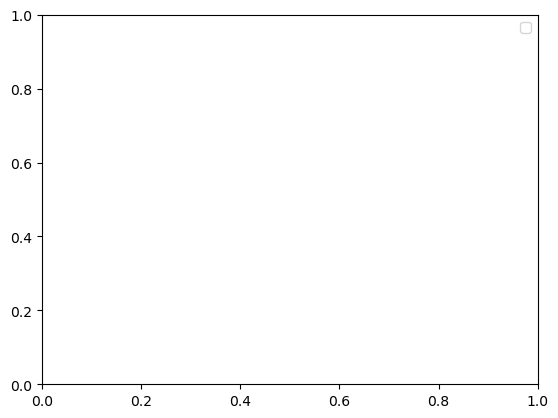

In [20]:
# Adding legend
plt.legend()

In [21]:
# Display the plot
plt.show()

# Question 8

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
file_path = r"C:\Users\rokad\Desktop\actor_kill_counts.csv"
deadliest_actors_data = pd.read_csv(file_path)

In [68]:
# Check the column names
print(deadliest_actors_data.columns)

Index(['Actor', 'Count'], dtype='object')


In [72]:
# Sort the data by kill count in descending order
sorted_data = deadliest_actors_data.sort_values(by='Count', ascending=False)

<BarContainer object of 10 artists>

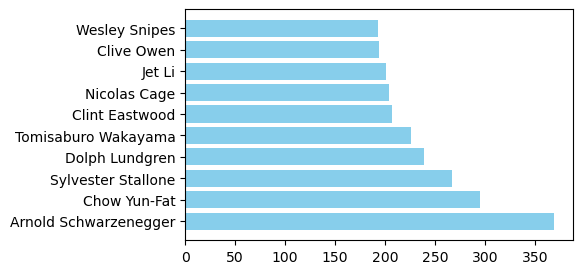

In [78]:
# Create a horizontal bar chart
plt.figure(figsize=(5, 3))  # Adjust the figure size if needed
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='skyblue')

Text(0.5, 1.0, 'Deadliest Actors in Hollywood')

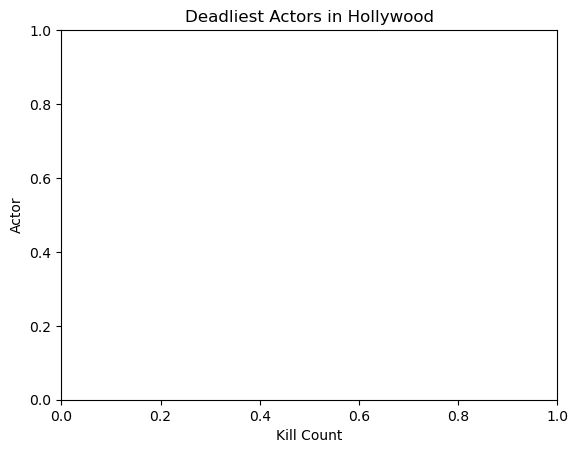

In [74]:

# Labeling axes and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

In [81]:
# Show the plot
plt.show()


# Question 9

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path
file_path = r'C:\Users\rokad\Desktop\roman-emperor-reigns.csv'

In [43]:
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)


In [44]:
# Filter data for assassinated emperors
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']


In [45]:
# Calculate the percentage of assassinated emperors
total_emperors = len(data)
assassinated_percentage = len(assassinated_emperors) / total_emperors * 100


In [46]:
# Create a pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_percentage, 100 - assassinated_percentage]


([<matplotlib.patches.Wedge at 0x2e4af7a8e90>,
 [Text(-0.9352388142210182, 0.5790754358237483, 'Assassinated'),
  Text(0.9352387600040586, -0.5790755233871235, 'Not Assassinated')],
 [Text(-0.5101302623023735, 0.3158593286311354, '32.4%'),
  Text(0.5101302327294864, -0.3158593763929764, '67.6%')])

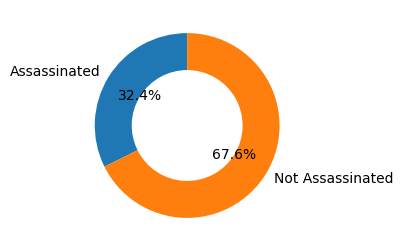

In [49]:
plt.figure(figsize=(3, 3))  # Adjust the figure size here
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))



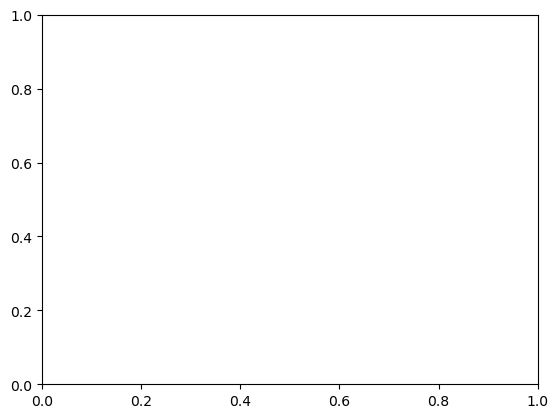

In [56]:
# Draw a circle in the center to make it a pie
centre_circle = plt.Circle((0, 0), 0.1, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

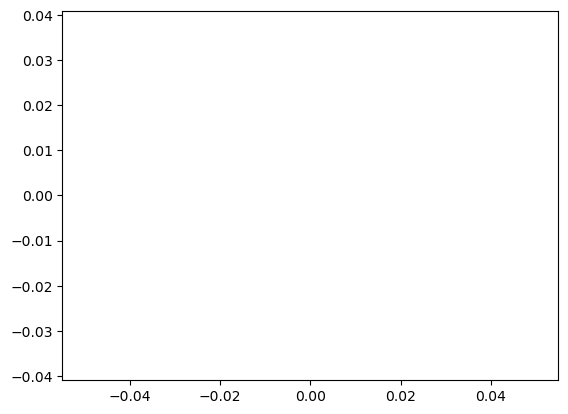

In [51]:
# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')  

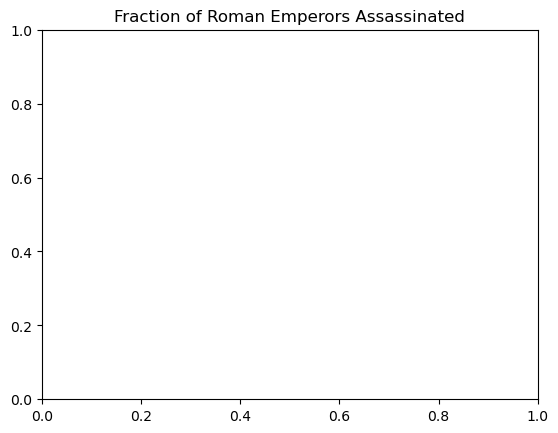

In [52]:
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()

# Question 10

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\rokad\Desktop\arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

In [60]:

# Create a scatter plot using seaborn
plt.figure(figsize=(5, 4))  # Adjust the figure size as needed

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

In [62]:
print(data.columns)


Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')


<Axes: xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

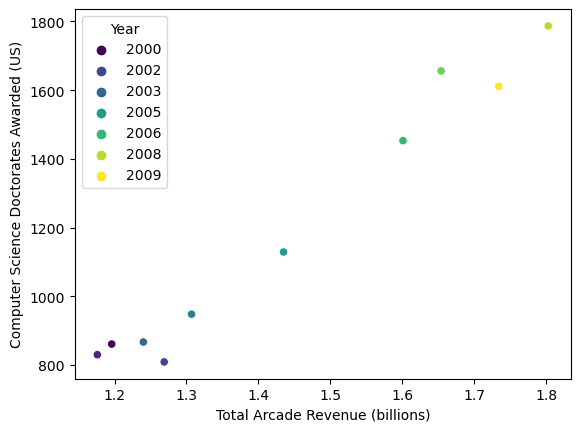

In [63]:
# Scatter plot with color-coded points for each year
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', data=data, palette='viridis')


Text(0, 0.5, 'Computer Science Doctorates Awarded (US)')

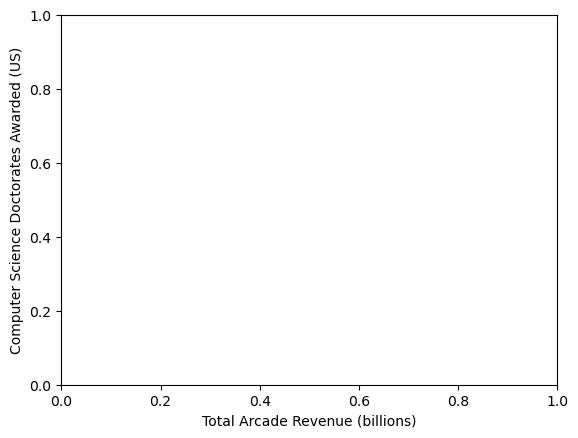

In [64]:
# Labeling axes
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

In [65]:
# Display the plot
plt.show()